# **NYC Property Sales Predictor (PSP) Data Preparation**

## **Goal**
For this entire project, I'm going to build a machine learning model that could predict the property sales price for properties in NYC. I'm dividing my project into the following sections:

* **EDA**
* **Data Preparation**
* **Modelling**

## **Project description**
In this document I'm showing the steps I took to make my data ready for the modelling phase. I'm cleaning my data, removing outliers and merge my New York City property sales data set with the New York City census data set.

## **Importing Libraries**

In [1]:
import pandas as pd # Data manipulation
import numpy as np # Scientific computing
from numpy import percentile # For IQR

import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Data Visualization

sns.set(style='darkgrid', context='notebook', palette='deep') # Theme
import matplotlib.style as style
style.use('fivethirtyeight') # Theme
import warnings; warnings.simplefilter('ignore') # Ignore warnings

## **Importing Data**
For this project I'm using my New York City Property Sales data set.

In [2]:
real_estate = pd.read_csv('data/nan_nyc_property_sales.csv')
census_data = pd.read_csv('data/nyc_census_tracts.csv')

# Creating copies
ps = real_estate.copy() 
census = census_data.copy()

# **Data Preparation Part**
The data preparation part of this project includes the following steps:

1. Basic data exploration
2. Identification of variables and data types
3. Data cleaning & removing outliers
4. Adding a new data set and merge it

## **1. Basic data exploration**
The basic data exploration includes the following pandas methods:
1. `info()` for printing a summary about the columns and data types in the dataframe.
2. `describe()` for showing statistical information about the nummerical values in the dataframe.
3. `head()` for showing the first 5 rows in the dataframe.

In [3]:
ps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         84548 non-null  object 
 1   NEIGHBORHOOD                    84548 non-null  object 
 2   BUILDING CLASS CATEGORY         84548 non-null  object 
 3   TAX CLASS AT PRESENT            84548 non-null  object 
 4   BLOCK                           84548 non-null  int64  
 5   LOT                             84548 non-null  int64  
 6   EASE-MENT                       84548 non-null  object 
 7   BUILDING CLASS AT PRESENT       84548 non-null  object 
 8   ADDRESS                         84548 non-null  object 
 9   APARTMENT NUMBER                84548 non-null  object 
 10  ZIP CODE                        84548 non-null  int64  
 11  RESIDENTIAL UNITS               84548 non-null  int64  
 12  COMMERCIAL UNITS                

In [4]:
ps.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,5.829600e+04,5.693600e+04,84548.000000,84548.000000,6.998700e+04
mean,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,3.941676e+03,4.045707e+03,1789.322976,1.657485,1.276456e+06
std,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,4.198397e+04,3.503249e+04,537.344993,0.819341,1.140526e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000e+00
25%,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1.650000e+03,1.046750e+03,1920.000000,1.000000,2.250000e+05
50%,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,2.325000e+03,1.680000e+03,1940.000000,2.000000,5.300000e+05
75%,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,3.500000e+03,2.560000e+03,1965.000000,2.000000,9.500000e+05
max,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09


In [5]:
ps.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17


## **2. Identification of variables and data types**
For this part of the project I'm identifying the type of variables in the dataset. It is imporant for machine learning to know with what kind of variables you are dealing with.
There are two types of variables:

1. ***Categorical***
2. ***Numerical***

For this step, I'm creating two lists for each dataset where I'm saving the different columns. I'm using list comprehensions because it allows me to write less code and saves me some time. I'm using conditional logic to assign the right columns to the data type list where it belongs. In the end, I'm using formatted strings to display the variables in a string.

In [6]:
# Select categorical columns
categorical_cols_re = [cname for cname in ps.columns if
                    ps[cname].dtype == "object"]
# Select numerical columns
numerical_cols_re = [cname for cname in ps.columns if 
                ps[cname].dtype in ['int64', 'float64']]

# Print the columns
print(f'There are {len(categorical_cols_re)} categorical columns in the property sales dataset. \nThe columns are: {categorical_cols_re}. \n')
print(f'There are {len(numerical_cols_re)} numerical columns in the property sales dataset. \nThe columns are: {numerical_cols_re}.')

There are 10 categorical columns in the property sales dataset. 
The columns are: ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'BUILDING CLASS AT TIME OF SALE', 'SALE DATE']. 

There are 11 numerical columns in the property sales dataset. 
The columns are: ['BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'SALE PRICE'].


## **3. Missing values, data cleaning & outlier detection**
In this part of this project, I'm going to clean the data en remove outliers. 

**NOTE:** One thing that I would like to mention is that at the end I still have values in my property sales dataset that have missing values. The reason why I'm not removing those values is that in my next document where I'm building a machine learning model I'm going to use machine learning pipelines to handle these values.

### **3.1 Missing values and data cleaning**
For this step of the project I'm checking for missing values in the datasets. I used my semi-cleaned version to check how many missing values this dataset contains.

In [7]:
ps.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

It seems that there are a lot of Sale Price values that have 0 as value. Because Sale Price is the target variable, it is necessary to drop these values. Also, I'm dropping the values that are 0 in other columns because that value is not appropriate in that numerical range. Also, I'm using a subset of the data where I'm excluding all the properties lower than 100.000 dollars on intuition because that is very unusual and will not help my model to create great predictions. There are 5 columns I would like to drop because they are not relevant for my project (in my opinion).

In [8]:
len(ps[ps['SALE PRICE']== 0]) # Checking how many properties have a price that is 0

10228

In [9]:
# Data cleaning
ps = ps[ps['SALE PRICE'].notnull()]
ps = ps[ps['SALE PRICE'] != 0]
ps = ps[ps['SALE PRICE'] >= 100000]
ps = ps[ps['YEAR BUILT'] != 0]
ps = ps[ps['ZIP CODE'] != 0]
ps = ps[ps['LAND SQUARE FEET'] != 0]
ps = ps[ps['GROSS SQUARE FEET'] != 0]


# Renaming the boroughs to numbers
ps['BOROUGH'][ps['BOROUGH'] == 'Manhattan'] = 1
ps['BOROUGH'][ps['BOROUGH'] == 'Bronx'] = 2
ps['BOROUGH'][ps['BOROUGH'] == 'Brooklyn'] = 3
ps['BOROUGH'][ps['BOROUGH'] == 'Queens'] = 4
ps['BOROUGH'][ps['BOROUGH'] == 'Staten Island'] = 5

# Dropping irrelevant columns
ps.drop('EASE-MENT', axis=1, inplace=True)
ps.drop('APARTMENT NUMBER', axis=1, inplace=True)
ps.drop('BLOCK', axis=1, inplace=True)
ps.drop('LOT', axis=1, inplace=True)
ps.drop('SALE DATE', axis=1, inplace=True)

In [10]:
# Checking if data cleaning worked
ps.isna().sum() 

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  18626
GROSS SQUARE FEET                 18774
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
dtype: int64

After dropping some columns and cleaning up the data there can be concluded that there are still missing values. In my modelling part of this project, I'm going to use pipelines to handle the rest of the missing values. For now, I'm taking a look at the outliers in the data set.

### **3.2 Outliers Detection**
I know from my previous notebook where I did my Exploratory Data Analysis that my target variable has a lot of outliers. There are lots of mistakes in the dataset such as very low property prices and even zero's that appear and that I fixed in the previous section. What I need to fix in this section are the outliers. First, take a look at the price distribution of the properties in NYC.

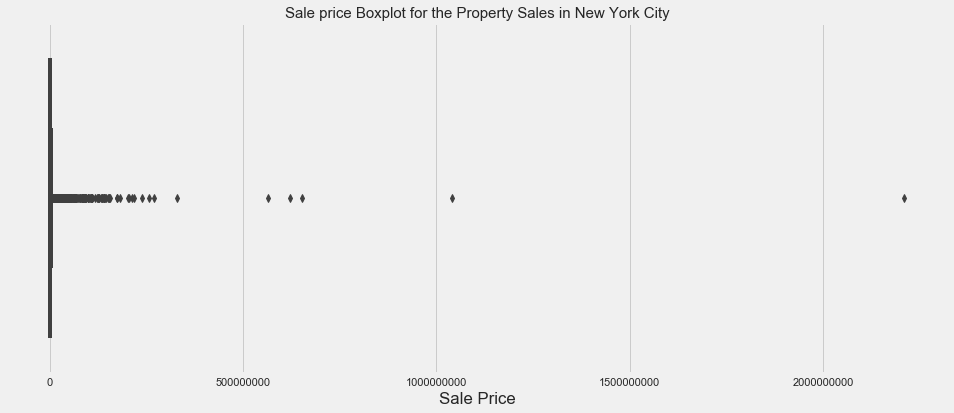

In [11]:
# Figure size and theme
plt.figure(figsize=(15,6))

# Plot the data
sns.boxplot(ps['SALE PRICE'])
plt.title('Sale price Boxplot for the Property Sales in New York City',fontsize=15)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Sale Price')
plt.show()

It seems that prices are not well distributed in the data. It is not strange to see lots of outliers at the higher price end because Manhatten is a very expensive place to live in New York City and not every data point is correct. To handle the outliers, I'm using a tactic called Interquartile Range (IQR) Method.

#### **3.2.1 IQR Method for Sale Price**
The IQR is the difference between the median of the upper half (75th percentile) and the median of the lower half (25th percentile). It defines the box in the boxplot.

The IQR can be used to identify outliers by defining limits on the sample values that are a factor k of the IQR below the 25th percentile or above the 75th percentile. The common value for the factor k is the value 1.5 and that's what I'm using in this example.

In [12]:
q25, q75 = percentile(ps['SALE PRICE'], 25), percentile(ps['SALE PRICE'], 75)
iqr = q75 - q25
print(f'Percentiles: 25th=%{q25}, 75th=%{q75}, IQR=%{iqr}')
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in ps['SALE PRICE'] if x < lower or x > upper]
print(f'Identified outliers: {len(outliers)}')
# remove outliers
outliers_removed = [x for x in ps['SALE PRICE'] if x >= lower and x <= upper]
print(f'Non-outlier observations: {len(outliers_removed)}')

Percentiles: 25th=%416000.0, 75th=%1100000.0, IQR=%684000.0
Identified outliers: 5245
Non-outlier observations: 41470


In [13]:
# Creating a new DataFrame where I'm using the prices in outliers_removed
without_outliers = ps[ps['SALE PRICE'].isin(outliers_removed)]

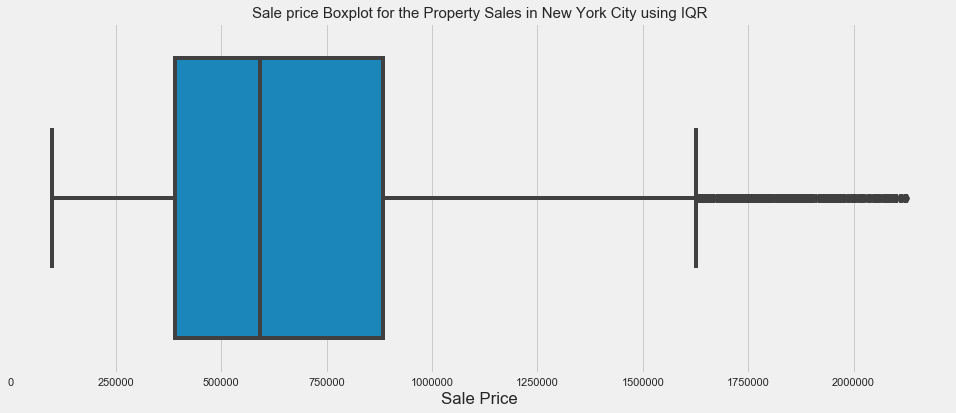

In [14]:
# Let'see the improved data 
# Figure size and theme
plt.figure(figsize=(15,6))

# Plot the data
sns.boxplot(without_outliers['SALE PRICE'])
plt.title('Sale price Boxplot for the Property Sales in New York City using IQR',fontsize=15)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('Sale Price')
plt.show()

#### **3.2.2 Land Square Feet and Gross Square Feet**
I noticed that the Land Square Feet and Gross Square Feet columns also had outliers that messed up the distribution. I didn't know what exactly a normal size was for an NYC property was so I used some articles to gain some knowledge to remove these outliers.

I used this [link](https://www.apartmenttherapy.com/what-is-considered-a-small-apartment-243701) knowledge about how big a small apartment is. I'm filtering properties in a range from 250sqft to 10,000sqft for the bigger properties.

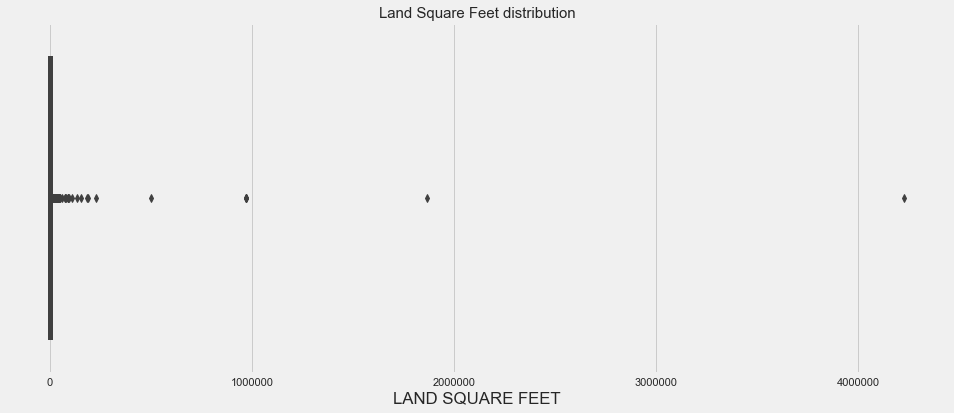

In [15]:
# Figure size and theme
plt.figure(figsize=(15,6))

# Plot the data
sns.boxplot(without_outliers['LAND SQUARE FEET'])
plt.title('Land Square Feet distribution',fontsize=15)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('LAND SQUARE FEET')
plt.show()

In [16]:
count = len(without_outliers[(without_outliers['LAND SQUARE FEET'] < 250) | (without_outliers['LAND SQUARE FEET'] > 10000)])
print(f'There are {count} properties that are less than 250 sqft or higher than 10000 sqft.')

There are 333 properties that are less than 250 sqft or higher than 10000 sqft.


It seems that there are 333 properties outside my range. My next step will be to filter out these properties so that my machine learning models performance should improve. I'm using some conditional logic to filter out the properties with missing values and the combination of 250 sqft and 10000 sqft for land square feet and gross square feet. After that, I'm checking for Land Square Feet if it worked.

In [17]:
without_outliers = without_outliers[(without_outliers['LAND SQUARE FEET'].isna())| ((without_outliers['LAND SQUARE FEET'] >= 250) & (without_outliers['LAND SQUARE FEET'] <= 10000))]
without_outliers = without_outliers[(without_outliers['GROSS SQUARE FEET'].isna())| ((without_outliers['GROSS SQUARE FEET'] >= 250) & (without_outliers['GROSS SQUARE FEET'] <= 10000))]

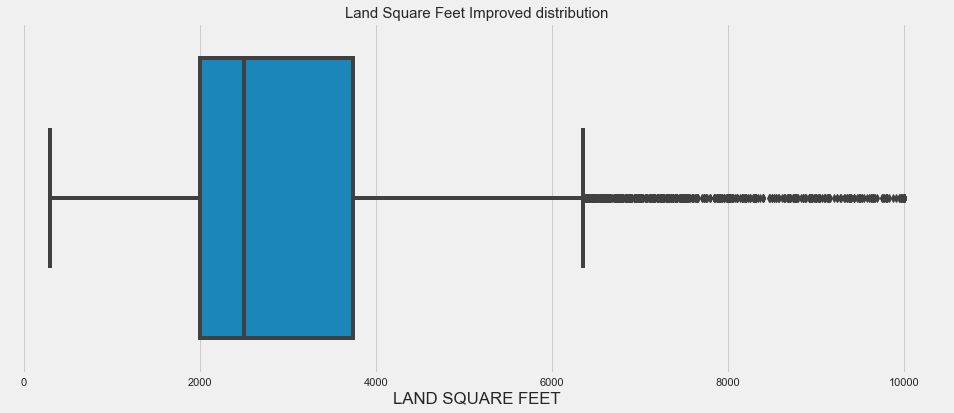

In [18]:
# Figure size and theme
plt.figure(figsize=(15,6))

# Plot the data
sns.boxplot(without_outliers['LAND SQUARE FEET'])
plt.title('Land Square Feet Improved distribution',fontsize=15)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel('LAND SQUARE FEET')
plt.show()

It worked. Let's go to the last part of this project.

## **4. Adding a new data set and merge it**
For the last part of this project, I'm going to combine my property sales data set with some of the columns of the NYC census data set. I'm using demographic information about the NYC population. I know that this is an ethical subject and for this project, I'm using it only to create new features.
My goal of merging these 2 datasets is that I have my property sales dataset include some group transforms from the census dataset. 

Group transforms aggregate information across multiple rows that are grouped by some category. Both of my data sets have the 'Borough' column. I'm using that column to merge the data sets. I'm creating new columns that were original in percentages and sum all of these data points together. First, I'm going to check if the census has any missing values.



In [19]:
census.isnull().sum()

CensusTract         0
County              0
Borough             0
TotalPop            0
Men                 0
Women               0
Hispanic           39
White              39
Black              39
Native             39
Asian              39
Citizen             0
Income             66
IncomeErr          66
IncomePerCap       46
IncomePerCapErr    46
Poverty            42
ChildPoverty       60
Professional       43
Service            43
Office             43
Construction       43
Production         43
Drive              43
Carpool            43
Transit            43
Walk               43
OtherTransp        43
WorkAtHome         43
MeanCommute        61
Employed            0
PrivateWork        43
PublicWork         43
SelfEmployed       43
FamilyWork         43
Unemployment       42
dtype: int64

In [20]:
# Fill numeric rows with the median
for label, content in census.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Fill missing numeric values with median since it's more robust than the mean
            census[label] = content.fillna(content.median())

Let's see if it worked

In [21]:
census.isnull().sum()

CensusTract        0
County             0
Borough            0
TotalPop           0
Men                0
Women              0
Hispanic           0
White              0
Black              0
Native             0
Asian              0
Citizen            0
Income             0
IncomeErr          0
IncomePerCap       0
IncomePerCapErr    0
Poverty            0
ChildPoverty       0
Professional       0
Service            0
Office             0
Construction       0
Production         0
Drive              0
Carpool            0
Transit            0
Walk               0
OtherTransp        0
WorkAtHome         0
MeanCommute        0
Employed           0
PrivateWork        0
PublicWork         0
SelfEmployed       0
FamilyWork         0
Unemployment       0
dtype: int64

Here I'm going to create more columns for my dataset using group transforms (technique that is used for feature engineering). The reason for doing this is that my model has more features to find patterns in which could lead to overall better model performance.

In [22]:
# Creating new columns 
census['no_hispanic'] = round((census['TotalPop'] / 100) * census['Hispanic'],0) # Number of hispanic residents
census['no_white'] = round((census['TotalPop'] / 100) * census['White'],0) # Number of white residents
census['no_black'] = round((census['TotalPop'] / 100) * census['Black'],0) # Number of black residents
census['no_native'] = round((census['TotalPop'] / 100) * census['Native'],0) # Number of native residents
census['no_asian'] = round((census['TotalPop'] / 100) * census['Asian'],0) # Number of native residents

census['no_unemployed'] = round((census['TotalPop'] / 100) * census['Unemployment'],0) # Number of unemployed residents
census['no_poverty'] = round((census['TotalPop'] / 100) * census['Poverty'],0) # Number of people living under poverty

# Renaming the boroughs to numbers
census['Borough'][census['Borough'] == 'Manhattan'] = 1
census['Borough'][census['Borough'] == 'Bronx'] = 2
census['Borough'][census['Borough'] == 'Brooklyn'] = 3
census['Borough'][census['Borough'] == 'Queens'] = 4
census['Borough'][census['Borough'] == 'Staten Island'] = 5

# Creating a new dataframe where I grouped the data on Borough
b = census.groupby('Borough')[['TotalPop', 'Men', 'Women','no_hispanic', 'no_white', 'no_black', 'no_native', 'no_asian', 'no_unemployed', 'no_poverty']].sum()

# Creating new column
median_income = census.groupby('Borough').median()
b['median_income'] = median_income['Income']
b.reset_index(inplace=True)

# Merging datasets
new_df = pd.merge(left=without_outliers, right=b, how='left', left_on='BOROUGH', right_on='Borough')

Let's take a look if it worked.

In [23]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41070 entries, 0 to 41069
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         41070 non-null  object 
 1   NEIGHBORHOOD                    41070 non-null  object 
 2   BUILDING CLASS CATEGORY         41070 non-null  object 
 3   TAX CLASS AT PRESENT            41070 non-null  object 
 4   BUILDING CLASS AT PRESENT       41070 non-null  object 
 5   ADDRESS                         41070 non-null  object 
 6   ZIP CODE                        41070 non-null  int64  
 7   RESIDENTIAL UNITS               41070 non-null  int64  
 8   COMMERCIAL UNITS                41070 non-null  int64  
 9   TOTAL UNITS                     41070 non-null  int64  
 10  LAND SQUARE FEET                25313 non-null  float64
 11  GROSS SQUARE FEET               25180 non-null  float64
 12  YEAR BUILT                      

In [24]:
new_df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,...,Men,Women,no_hispanic,no_white,no_black,no_native,no_asian,no_unemployed,no_poverty,median_income
0,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,C6,"327 EAST 3 STREET, 1C",10009,0,0,0,...,769434,860073,420410.0,767710.0,207591.0,2211.0,188553.0,129805.0,291346.0,76154.0
1,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,C6,"327 EAST 3RD STREET, 5A",10009,0,0,0,...,769434,860073,420410.0,767710.0,207591.0,2211.0,188553.0,129805.0,291346.0,76154.0
2,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,C6,"327 EAST 3 STREET, 2E",10009,0,0,0,...,769434,860073,420410.0,767710.0,207591.0,2211.0,188553.0,129805.0,291346.0,76154.0
3,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,C6,"317 EAST 3RD STREET, 12",10009,0,0,0,...,769434,860073,420410.0,767710.0,207591.0,2211.0,188553.0,129805.0,291346.0,76154.0
4,1,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,C6,"311 EAST 3RD STREET, 17",10009,0,0,0,...,769434,860073,420410.0,767710.0,207591.0,2211.0,188553.0,129805.0,291346.0,76154.0


Now I have a bigger data set where I'm combining information about NYC properties and demographic information about NYC. I'm going to drop the second Borough column from this data set and I'm exporting it so that it is ready for my next document where I'm going to make a machine learning model.

In [25]:
# Dropping the 2nd borough column
new_df.drop('Borough', axis=1, inplace=True)

# Exporting the merged data set
new_df.to_csv('data/merged_nyc_dataset.csv', index=False)